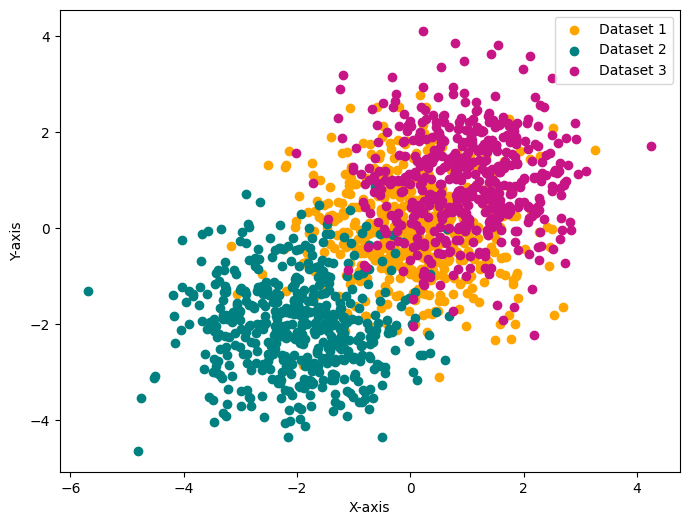

Predicted y: 2
Predicted y: 1
Predicted y: 3
Predicted y: 3


In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 500
mean = [[0, 0], [-2, -2], [1, 1]]
h1 = 1
h2 = np.sqrt(0.1)

cov_matrix = [[1, 0],
              [0, 1]]

def generate_data_set():
    data_set = []
    for i in range(3):
        data_set.append(np.random.multivariate_normal(mean[i], cov_matrix, N))
    return data_set

def normal_kernel(x, mean):
    return np.exp(-0.5 * np.transpose(x - mean) @ np.linalg.inv(cov_matrix) @ (x - mean)) / (2 * np.pi)

def calculate_parzen_window(train_data, mean, x, h):
    n = len(train_data)
    estimation = 0
    for i in range(n):
        estimation += normal_kernel((x - train_data[i]) / h, mean)
    estimation /= (h**2 * n)
    return estimation

def plot_train_data(data_set1, data_set2, data_set3):
    plt.figure(figsize=(8, 6))

    plt.scatter(data_set1[:, 0], data_set1[:, 1], color='orange', label='Dataset 1')
    plt.scatter(data_set2[:, 0], data_set2[:, 1], color='teal', label='Dataset 2')
    plt.scatter(data_set3[:, 0], data_set3[:, 1], color='mediumvioletred', label='Dataset 3')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

data_set1, data_set2, data_set3 = generate_data_set()
plot_train_data(data_set1, data_set2, data_set3)

Points = [[-4, -4], [-1, 0], [2, 2], [1.5, 0]]

for i in range(4):
    estimations = []
    for j in range(3):
        estimations.append(calculate_parzen_window(data_set1, mean[j], Points[i], h1))
    print("Predicted y: " + str(np.argmax(estimations) + 1))